/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.26255020080321284
Confusion Matrix:
[[  0 850 290]
 [  0 416 272]
 [  0  57 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1140
           1       0.31      0.60      0.41       688
           2       0.16      0.65      0.26       164

    accuracy                           0.26      1992
   macro avg       0.16      0.42      0.22      1992
weighted avg       0.12      0.26      0.16      1992



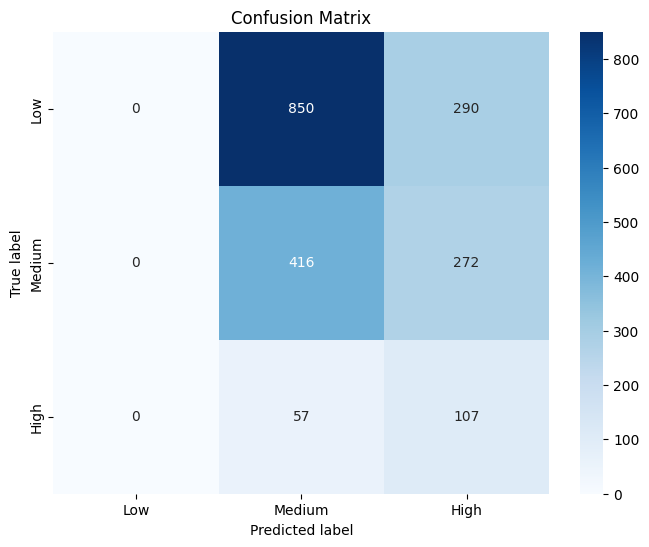

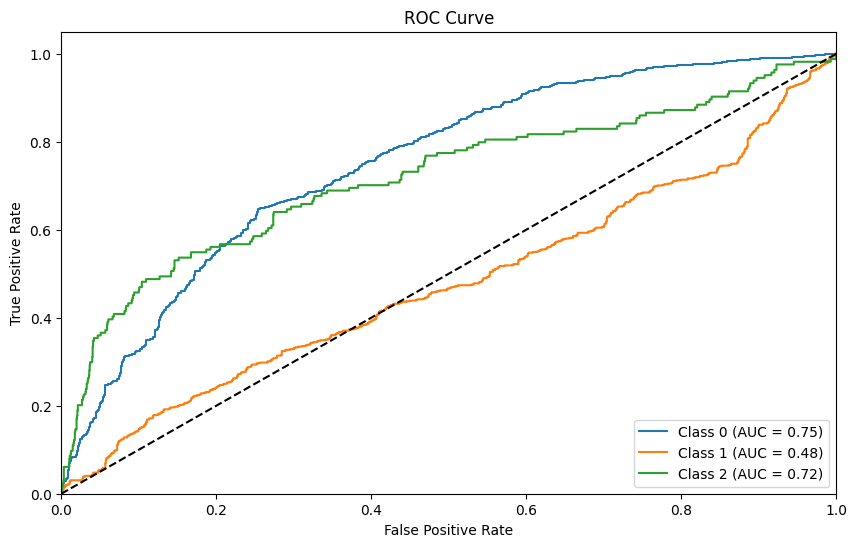

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns

# Load the dataset
file_path = 'cleaned_rent_apartment.csv'
data = pd.read_csv(file_path)

# Split the data into features and target variable
X = data.drop(columns=['price'])
y = data['price']

# Bin the target variable into 3 categories
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC curve and AUC
y_prob = nb.predict_proba(X_test_scaled)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
